In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('spam.tsv',sep='\t')

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df.shape

(5572, 4)

In [9]:
df['label'].value_counts()*100/len(df)

ham     86.593683
spam    13.406317
Name: label, dtype: float64

In [10]:
ham = df[df['label']=='ham']
spam = df[df['label']=='spam']

In [11]:
ham.shape

(4825, 4)

In [12]:
spam.shape

(747, 4)

In [14]:
ham = ham.sample(len(spam))

In [15]:
ham.shape

(747, 4)

In [17]:
data = ham.append(spam,ignore_index=True)

In [18]:
data.shape

(1494, 4)

In [19]:
data.head()

,label,message,length,punct
0,ham,Jus came back fr lunch wif my sis only. U leh?,46,2
1,ham,I hope you that's the result of being consiste...,158,3
2,ham,Dude we should go sup again,27,0
3,ham,Do ü all wan 2 meet up n combine all the parts...,82,3
4,ham,I'm at home. Please call,24,2


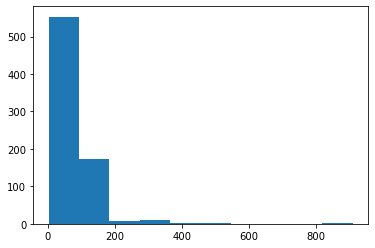

In [21]:
plt.hist(data[data['label']=='ham']['length'])
plt.show()

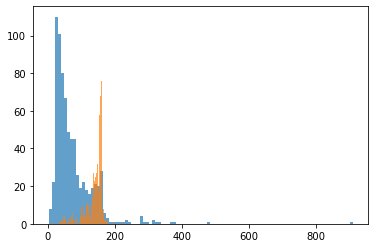

In [26]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)

plt.show()

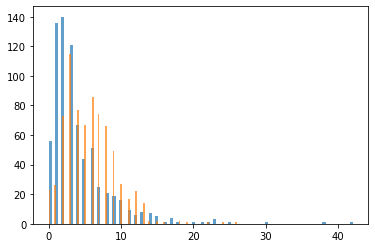

In [28]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)

plt.show()

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(data['message'],data['label'],test_size=0.2,random_state=0,shuffle=True)

In [33]:
X_train.shape

(1195,)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [56]:
classifier = Pipeline([("tfidf",TfidfVectorizer()),("classifier",RandomForestClassifier(n_estimators=10))])

In [57]:
classifier.fit(X_train,Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [58]:
y_pred = classifier.predict(X_test)

In [59]:
classifier.score(y_pred,Y_test)

0.5050167224080268

In [60]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [61]:
accuracy_score(Y_test,y_pred)

0.9431438127090301

In [62]:
confusion_matrix(Y_test,y_pred)

array([[150,   1],
       [ 16, 132]])

In [63]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.95       151
        spam       0.99      0.89      0.94       148

    accuracy                           0.94       299
   macro avg       0.95      0.94      0.94       299
weighted avg       0.95      0.94      0.94       299



In [64]:
from sklearn.svm import SVC

In [68]:
classifier1 = Pipeline([("tfidf",TfidfVectorizer()),("classifier",SVC(C=100,gamma='auto'))])

In [69]:
classifier1.fit(X_train,Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [70]:
y_pred1 = classifier.predict(X_test)

In [71]:
accuracy_score(Y_test,y_pred1)

0.9431438127090301

In [72]:
print(classification_report(Y_test,y_pred1))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.95       151
        spam       0.99      0.89      0.94       148

    accuracy                           0.94       299
   macro avg       0.95      0.94      0.94       299
weighted avg       0.95      0.94      0.94       299



In [73]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [77]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['ham']


In [78]:
print(classifier1.predict(test1))
print(classifier1.predict(test2))
print(classifier1.predict(test3))

['ham']
['ham']
['spam']
